## Import Libraries

In [14]:
import pandas as pd
import missingno

In [7]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [8]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,143439,143439,143439,144285,145008,145552,145996,146523,146523,146523
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815


<AxesSubplot:>

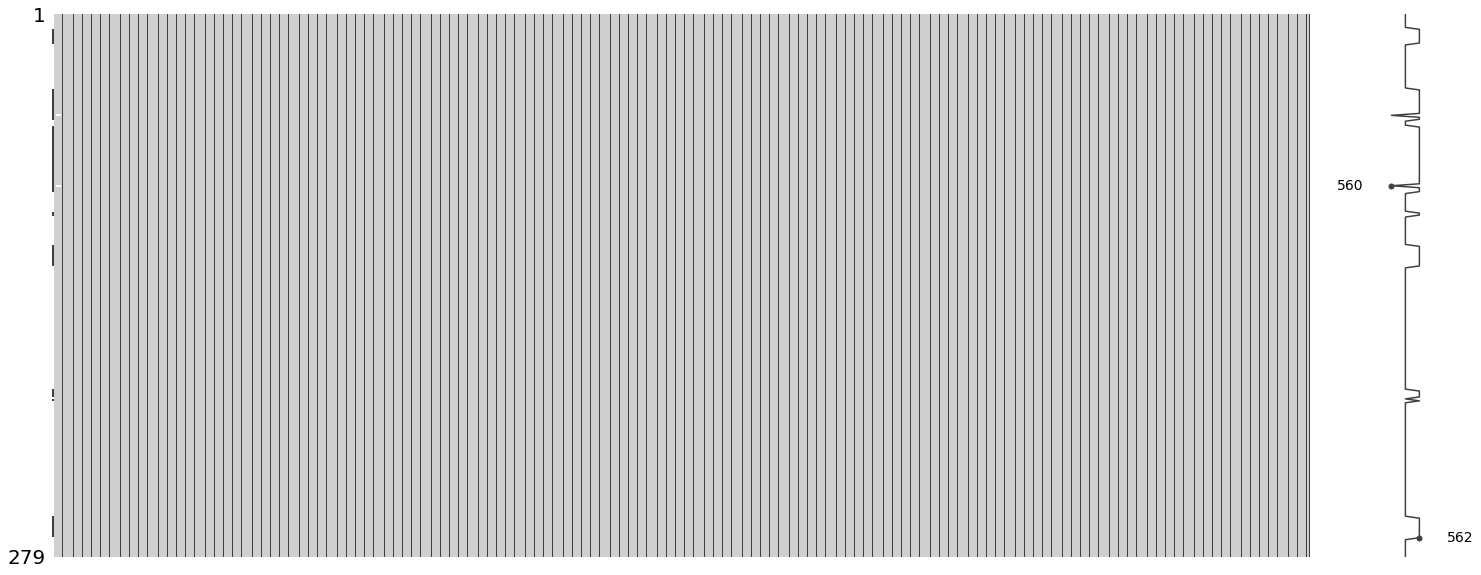

In [20]:
missingno.matrix(df)

## Data Cleaning

In [50]:
df = df.drop(['Province/State','Lat','Long'], axis=1)

In [51]:
df = df.groupby('Country/Region').agg('sum')
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,143439,143439,143439,144285,145008,145552,145996,146523,146523,146523
Albania,0,0,0,0,0,0,0,0,0,0,...,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121
Algeria,0,0,0,0,0,0,0,0,0,0,...,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564
Andorra,0,0,0,0,0,0,0,0,0,0,...,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678
Angola,0,0,0,0,0,0,0,0,0,0,...,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815


In [52]:
df = df.T

In [57]:
# Index represented by date value
df_time = pd.to_datetime(df.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
df = df.set_index(datetime_index)
df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 558 entries, 2020-01-22 to 2021-08-01
Columns: 195 entries, Afghanistan to Zimbabwe
dtypes: int64(195)
memory usage: 854.4 KB


In [59]:
df.describe()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02,558.000000,558.000000,558.000000,...,5.580000e+02,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,43681.691756,50634.627240,66092.580645,5876.206093,12987.998208,403.324373,1.413477e+06,102105.394265,20510.175627,250238.532258,...,1.976539e+06,71698.388889,52642.137993,1.186380,95636.019713,5423.569892,110904.946237,2517.055556,41399.405018,18633.924731
std,33885.626956,54163.634287,52034.093099,5422.719250,13397.324003,502.224521,1.478618e+06,86528.862367,11428.022791,257456.764389,...,1.972872e+06,120581.616468,39862.784165,1.572095,91194.324110,17988.644298,119529.458201,2322.917038,51784.196426,22237.852003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21633.000000,1309.500000,10407.500000,852.000000,100.250000,26.000000,2.506750e+04,13782.000000,7276.750000,16985.500000,...,2.682115e+05,846.250000,4545.750000,0.000000,2658.500000,332.000000,482.000000,533.000000,1200.000000,315.500000
50%,40984.500000,19587.000000,56562.500000,4367.500000,9757.500000,124.000000,1.109455e+06,79610.000000,27546.000000,84684.500000,...,9.092040e+05,2894.000000,65774.000000,0.000000,90223.500000,1170.500000,51240.000000,2060.000000,16221.500000,8309.000000
75%,55985.000000,117881.250000,115373.750000,11283.250000,21400.250000,963.000000,2.200345e+06,178622.750000,29135.250000,494990.000000,...,4.275558e+06,72569.250000,80650.250000,3.000000,146210.750000,2556.250000,211027.500000,2890.000000,84911.750000,36499.000000
max,146523.000000,133121.000000,172564.000000,14678.000000,42815.000000,1303.000000,4.935847e+06,230339.000000,34612.000000,659508.000000,...,5.907594e+06,381569.000000,130216.000000,4.000000,306673.000000,157507.000000,316861.000000,7070.000000,196293.000000,109546.000000


In [60]:
# Selecting the confirmed COVID-19 case where the date is 15th
df[df.index.day == 15]

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-02-15,0,0,0,0,0,0,0,0,15,0,...,18,0,0,0,0,16,0,0,0,0
2020-03-15,16,42,48,1,0,1,45,26,297,860,...,3077,8,1,0,10,56,38,0,0,0
2020-04-15,785,494,2160,673,19,23,2443,1111,6440,14336,...,107465,493,1302,0,197,267,291,1,48,23
2020-05-15,6054,916,6629,761,48,25,7479,4044,7035,16109,...,227334,732,2686,0,459,314,375,106,654,42
2020-06-15,25531,1590,11031,853,142,26,32785,17064,7347,17135,...,273888,848,5263,0,3062,334,505,844,1382,387
2020-07-15,34984,3752,20770,862,576,74,111146,33005,10810,19154,...,293469,1009,14581,0,10428,381,7064,1526,1895,1089
2020-08-15,37542,7260,38133,989,1879,93,289100,41495,23287,23179,...,319232,1434,34528,0,32607,951,16153,1858,9186,5176
2020-09-15,38815,11672,48734,1438,3569,95,577338,46119,26778,34305,...,376672,1827,48429,0,62655,1063,32250,2016,13819,7576
2020-10-15,40026,16212,53777,3190,7096,112,949063,59995,27371,60224,...,676457,2417,62278,0,85469,1124,46100,2053,15659,8075
2020-11-15,43240,27830,67679,5872,13451,134,1310491,117337,27749,203956,...,1372886,4030,70243,1,97352,1281,63031,2068,17123,8829


In [65]:
# Selecting the data where the month is June
# June, all years(2020 & 2021)
df[df.index.month == 6] 

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-06-01,15753,1143,9513,765,86,26,17415,9492,7221,16733,...,258983,825,3702,0,1662,328,449,354,1089,203
2020-06-02,16512,1164,9626,844,86,26,18319,10009,7229,16759,...,260453,826,3760,0,1819,328,451,399,1089,206
2020-06-03,17270,1184,9733,851,86,26,19268,10524,7240,16771,...,261802,828,3843,0,1952,328,457,419,1089,222
2020-06-04,18057,1197,9831,852,86,26,20197,11221,7247,16805,...,263040,832,3939,0,2087,328,464,453,1089,237
2020-06-05,18972,1212,9935,852,86,26,21037,11817,7252,16843,...,264150,834,4007,0,2145,328,464,469,1089,265
2020-06-06,19554,1232,10050,852,88,26,22020,12364,7259,16898,...,264944,845,4094,0,2316,329,464,482,1089,279
2020-06-07,20345,1246,10154,852,91,26,22794,13130,7265,16902,...,265662,845,4331,0,2377,331,472,484,1089,282
2020-06-08,20920,1263,10265,852,92,26,23620,13325,7267,16968,...,266756,845,4440,0,2473,332,473,496,1200,287
2020-06-09,21462,1299,10382,852,96,26,24761,13675,7274,16979,...,267915,846,4520,0,2632,332,481,524,1200,314
2020-06-10,22146,1341,10484,852,113,26,25987,14103,7285,17005,...,269101,847,4623,0,2738,332,485,560,1200,320


In [66]:
# April, 2021
df.loc['2021-04'] 

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2021-04-01,56517,125506,117304,12053,22399,1147,2363251,193736,29333,549592,...,4364547,108188,83050,3,161751,2617,244645,4531,88549,36896
2021-04-02,56572,125842,117429,12115,22467,1152,2373153,194852,29341,552729,...,4367969,111568,83239,3,162730,2620,246893,4620,88730,36903
2021-04-03,56595,126183,117524,12174,22579,1170,2383537,196044,29348,556012,...,4371393,113904,83435,3,164337,2626,248482,4697,88800,36911
2021-04-04,56676,126531,117622,12231,22631,1170,2393492,196634,29357,558755,...,4373798,117757,83623,3,166123,2631,251288,4798,88930,36923
2021-04-05,56717,126795,117739,12286,22717,1173,2407159,197113,29365,560972,...,4376629,119958,83802,3,167548,2637,253922,4881,89009,36934
2021-04-06,56779,126936,117879,12328,22885,1173,2428029,197873,29379,562907,...,4379033,123063,83935,3,169074,2648,256461,4975,89071,36966
2021-04-07,56873,127192,118004,12363,23010,1177,2450068,198898,29385,566008,...,4381830,126987,84127,3,170189,2659,259133,5047,89386,36984
2021-04-08,56943,127509,118116,12409,23108,1180,2473751,200129,29390,568914,...,4384954,130657,84322,3,171373,2668,262017,5133,89592,37052
2021-04-09,57019,127795,118251,12456,23242,1182,2497881,201158,29396,571616,...,4380167,137946,84529,3,172461,2683,264395,5233,89783,37147
2021-04-10,57144,128155,118378,12497,23331,1197,2517300,202167,29405,574755,...,4382880,141380,84724,3,173786,2692,265897,5276,89918,37273


In [67]:
# July, 2021
df[(df.index.month == 7) & (df.index.year == 2021)] 

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2021-07-01,120216,132523,140075,13918,38965,1264,4491551,225221,30684,650474,...,4844944,370600,111153,4,274024,17727,314288,6923,157832,51221
2021-07-02,120216,132526,140550,13918,39089,1264,4512439,225339,30734,650569,...,4871807,371417,111648,4,275205,18121,314409,6924,160613,52663
2021-07-03,120216,132534,141007,13918,39172,1264,4526473,225464,30753,650662,...,4896272,372178,112130,4,276395,19310,314492,6926,162487,53665
2021-07-04,120216,132535,141471,13918,39230,1264,4535473,225553,30804,650737,...,4920168,372709,112597,4,277635,20261,314569,6929,164282,54474
2021-07-05,125937,132537,141966,13918,39300,1264,4552750,225606,30831,650817,...,4947274,373286,113072,4,278665,21312,314569,6929,165513,56014
2021-07-06,127464,132544,142447,13991,39375,1265,4574340,225661,30861,650901,...,4975903,374019,113568,4,279813,22341,314780,6931,167132,57963
2021-07-07,129021,132557,143032,14021,39491,1265,4593763,225801,30903,651008,...,5007964,374665,114039,4,280980,23385,314869,6934,169003,60227
2021-07-08,130113,132565,143652,14050,39593,1266,4613019,225987,30951,651128,...,5040060,375298,114529,4,281907,24810,314869,6936,170456,62383
2021-07-09,131586,132580,144483,14075,39791,1266,4627537,226135,31015,651291,...,5075945,375902,115011,4,282940,26608,315047,6940,172405,65066
2021-07-10,131586,132587,145296,14075,39881,1266,4639098,226285,31100,651453,...,5107780,376281,115478,4,283742,28470,315107,6941,174789,66853


In [69]:
#  Select the data from July 1 2021, to August 2 2021
df['2021-07-01':'2021-08-01']

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2021-07-01,120216,132523,140075,13918,38965,1264,4491551,225221,30684,650474,...,4844944,370600,111153,4,274024,17727,314288,6923,157832,51221
2021-07-02,120216,132526,140550,13918,39089,1264,4512439,225339,30734,650569,...,4871807,371417,111648,4,275205,18121,314409,6924,160613,52663
2021-07-03,120216,132534,141007,13918,39172,1264,4526473,225464,30753,650662,...,4896272,372178,112130,4,276395,19310,314492,6926,162487,53665
2021-07-04,120216,132535,141471,13918,39230,1264,4535473,225553,30804,650737,...,4920168,372709,112597,4,277635,20261,314569,6929,164282,54474
2021-07-05,125937,132537,141966,13918,39300,1264,4552750,225606,30831,650817,...,4947274,373286,113072,4,278665,21312,314569,6929,165513,56014
2021-07-06,127464,132544,142447,13991,39375,1265,4574340,225661,30861,650901,...,4975903,374019,113568,4,279813,22341,314780,6931,167132,57963
2021-07-07,129021,132557,143032,14021,39491,1265,4593763,225801,30903,651008,...,5007964,374665,114039,4,280980,23385,314869,6934,169003,60227
2021-07-08,130113,132565,143652,14050,39593,1266,4613019,225987,30951,651128,...,5040060,375298,114529,4,281907,24810,314869,6936,170456,62383
2021-07-09,131586,132580,144483,14075,39791,1266,4627537,226135,31015,651291,...,5075945,375902,115011,4,282940,26608,315047,6940,172405,65066
2021-07-10,131586,132587,145296,14075,39881,1266,4639098,226285,31100,651453,...,5107780,376281,115478,4,283742,28470,315107,6941,174789,66853


In [72]:
#  Select 10 Countries with the most confirmed COVID-19 cases
#Sort by confirmed cases on the latest date (index.value[-1])
df = df.sort_values(by=df.index.values[-1], axis=1,ascending=False)
#Select first 10 countries
df = df.iloc[:,0:10]
df.tail()

Country/Region,US,India,Brazil,France,Russia,United Kingdom,Turkey,Argentina,Colombia,Spain
2021-07-28,34672690,31528114,19797086,6116853,6116249,5797445,5660469,4891810,4757139,4395602
2021-07-29,34750860,31572344,19839369,6142282,6138969,5828316,5682630,4905925,4766829,4422291
2021-07-30,34945468,31613993,19880273,6166690,6161985,5857639,5704713,4919408,4776291,4447044
2021-07-31,34978276,31655824,19917855,6190334,6185249,5883421,5727045,4929764,4785320,4447044
2021-08-01,35003417,31695958,19938358,6209934,6207513,5907594,5747935,4935847,4794414,4447044


## Resampling Dataframe

Mean-resampled of confirmed COVID-19 cases in a weekly interval

In [74]:
#Resampled dataframe
df.resample('W').mean()


Country/Region,US,India,Brazil,France,Russia,United Kingdom,Turkey,Argentina,Colombia,Spain
2020-01-26,2.200000e+00,0.000000e+00,0.000000e+00,1.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2020-02-02,6.571429e+00,7.142857e-01,0.000000e+00,4.857143e+00,8.571429e-01,8.571429e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.857143e-01
2020-02-09,1.157143e+01,3.000000e+00,0.000000e+00,7.428571e+00,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.142857e+00
2020-02-16,1.342857e+01,3.000000e+00,0.000000e+00,1.128571e+01,2.000000e+00,1.657143e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
2020-02-23,1.485714e+01,3.000000e+00,0.000000e+00,1.200000e+01,2.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
...,...,...,...,...,...,...,...,...,...,...
2021-07-04,3.368256e+07,3.045466e+07,1.862006e+07,5.840304e+06,5.474180e+06,4.844783e+06,5.430292e+06,4.486807e+06,4.268939e+06,3.817749e+06
2021-07-11,3.379603e+07,3.075049e+07,1.895697e+07,5.861481e+06,5.639848e+06,5.042013e+06,5.465408e+06,4.606922e+06,4.447351e+06,3.910282e+06
2021-07-18,3.399001e+07,3.102619e+07,1.925119e+07,5.898936e+06,5.810902e+06,5.307763e+06,5.506609e+06,4.715934e+06,4.584232e+06,4.056787e+06
2021-07-25,3.429834e+07,3.128824e+07,1.954294e+07,5.995634e+06,5.978850e+06,5.618963e+06,5.566536e+06,4.811180e+06,4.692516e+06,4.237322e+06


<AxesSubplot:>

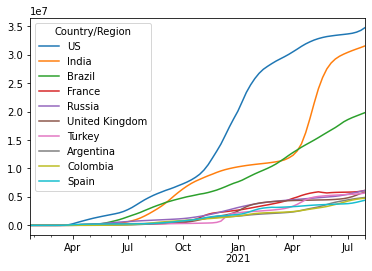

In [75]:
# Plotting the chart 
df.resample('W').mean().plot()

<AxesSubplot:>

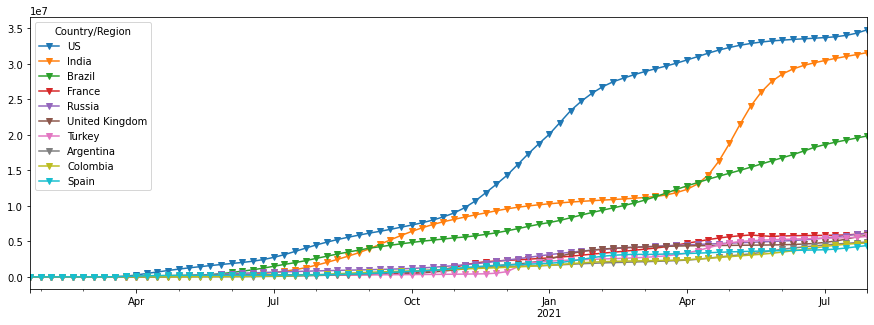

In [76]:
df.resample('W').mean().plot(marker="v",figsize=(15,5))

## Percentage Growth

In [77]:
df.resample('W').mean().pct_change()

Country/Region,US,India,Brazil,France,Russia,United Kingdom,Turkey,Argentina,Colombia,Spain
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,1.987013,inf,NaN,2.035714,inf,inf,NaN,NaN,NaN,inf
2020-02-09,0.760870,3.200000,NaN,0.529412,1.333333,10.666667,NaN,NaN,NaN,3.000000
2020-02-16,0.160494,0.000000,NaN,0.519231,0.000000,0.657143,NaN,NaN,NaN,0.750000
2020-02-23,0.106383,0.000000,NaN,0.063291,0.000000,0.327586,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...
2021-07-04,0.002676,0.010730,0.021756,0.002445,0.027494,0.030555,0.006937,0.032270,0.051083,0.011083
2021-07-11,0.003369,0.009714,0.018093,0.003626,0.030263,0.040710,0.006467,0.026771,0.041793,0.024237
2021-07-18,0.005740,0.008966,0.015521,0.006390,0.030330,0.052707,0.007538,0.023663,0.030778,0.037467
2021-07-25,0.009071,0.008446,0.015155,0.016392,0.028902,0.058631,0.010883,0.020197,0.023621,0.044502


<AxesSubplot:>

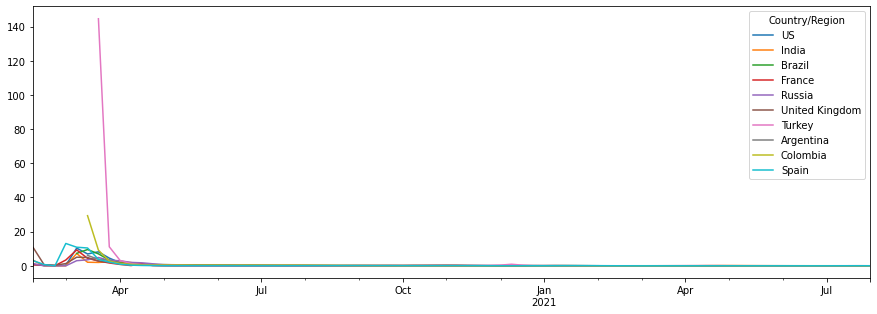

In [88]:
# Ignoring the first 2 lines because of some Nan and inf values by using iloc[2:]
df.resample('W').mean().pct_change().iloc[2:].plot(figsize=(15,5))

## Identifying Trends in Time-Series Dataframe

<AxesSubplot:>

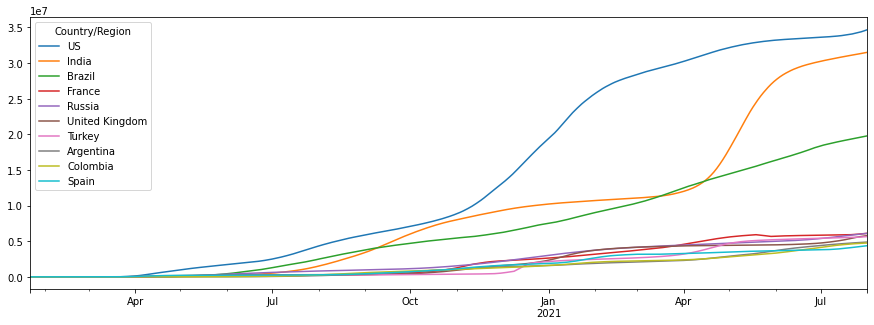

In [90]:
# Plotting the rolling average of confirmed COVID-19 cases by window size of 10 days
df.rolling('10D').mean().plot(figsize=(15,5))